In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


C:\Users\MMucahitNAS\AppData\Local\Temp\ipykernel_19068\969395466.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), cmap='viridis')


<Axes: >

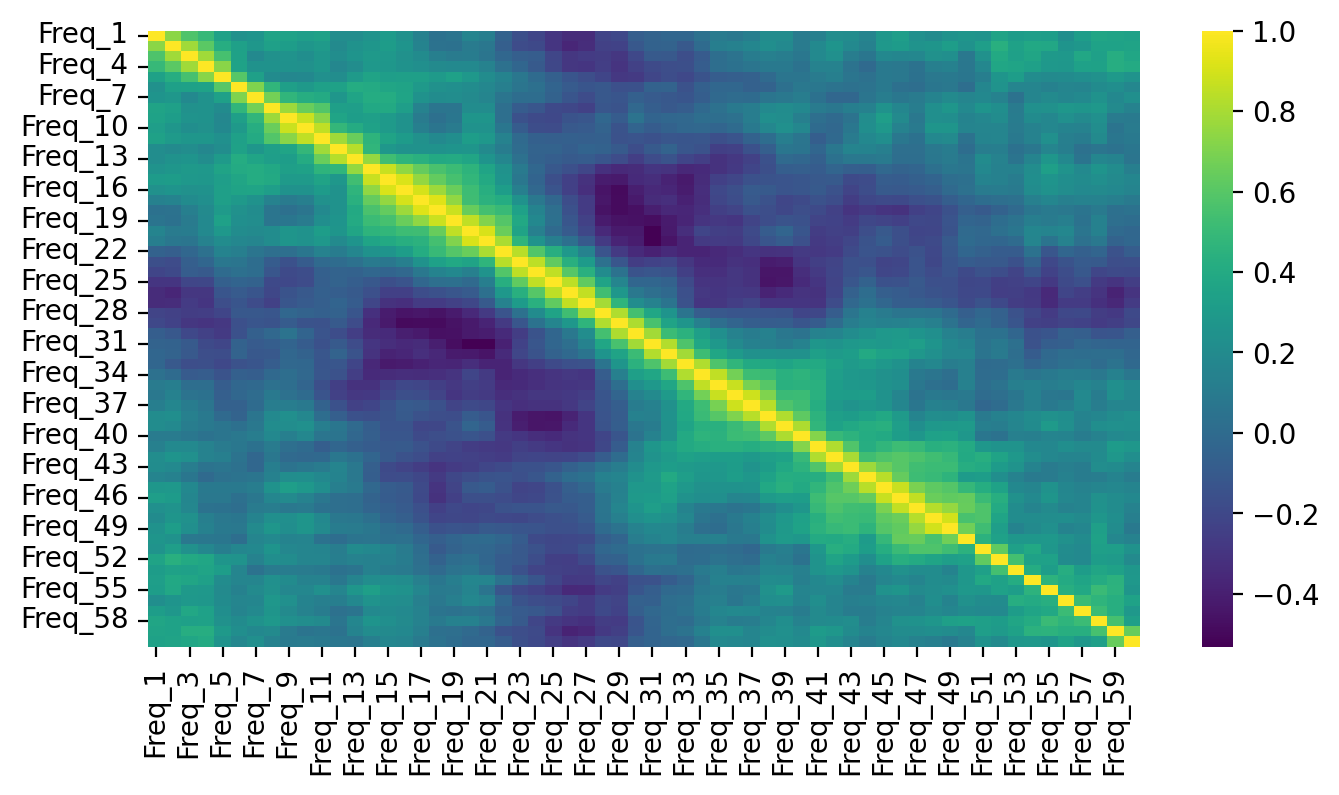

In [3]:
plt.figure(figsize=(8, 4), dpi=200)
sns.heatmap(data=df.corr(), cmap='viridis')

In [4]:
df["Label"] = [0 if i=="M" else 1 for i in df["Label"]]
np.absolute(df.corrwith(df["Label"], axis=0)).sort_values(ascending=True)[-6:]

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
dtype: float64

In [5]:
X = df.drop("Label", axis=1)
y = df["Label"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
knn = KNeighborsClassifier()

pipe = Pipeline([("scaler", scaler), ("knn", knn)])
n_neigh = list(range(1, 30))
param_grid = {"knn__n_neighbors":n_neigh}


In [7]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(estimator=pipe, param_grid=param_grid,scoring="accuracy", cv=10)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [8]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [9]:
grid_model.cv_results_

{'mean_fit_time': array([0.00462017, 0.00460467, 0.00305288, 0.00354056, 0.0038404 ,
        0.00324295, 0.00377707, 0.00492973, 0.00359409, 0.00391171,
        0.00434949, 0.00313783, 0.00374646, 0.00638461, 0.00371671,
        0.00525877, 0.00661986, 0.00310667, 0.0058347 , 0.00441687,
        0.00378504, 0.00374715, 0.00321679, 0.00300217, 0.00474479,
        0.0034358 , 0.00294132, 0.00370092, 0.00410323]),
 'std_fit_time': array([0.00209941, 0.00195313, 0.00173606, 0.00059861, 0.00114546,
        0.00060902, 0.0016874 , 0.00296676, 0.00049173, 0.00251081,
        0.00116916, 0.00030231, 0.00130543, 0.00326238, 0.00117166,
        0.00243956, 0.00869755, 0.00032799, 0.0036913 , 0.00182885,
        0.00107739, 0.00102367, 0.00043693, 0.00039096, 0.00197105,
        0.00052121, 0.00110476, 0.00062934, 0.00152676]),
 'mean_score_time': array([0.01392677, 0.00659757, 0.00583229, 0.00597079, 0.00914929,
        0.00551088, 0.00580413, 0.00778997, 0.00520289, 0.00612538,
        0.007633

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_preds = grid_model.predict(X_test )
confusion_matrix(y_test, y_preds)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [11]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

